## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop = pd.read_csv('laptop_data.csv')
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
laptop = laptop.drop(['Unnamed: 0'], axis = 1 ) # Dropping an unnecessary column

In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


<Axes: title={'center': 'Types Of Laptop'}>

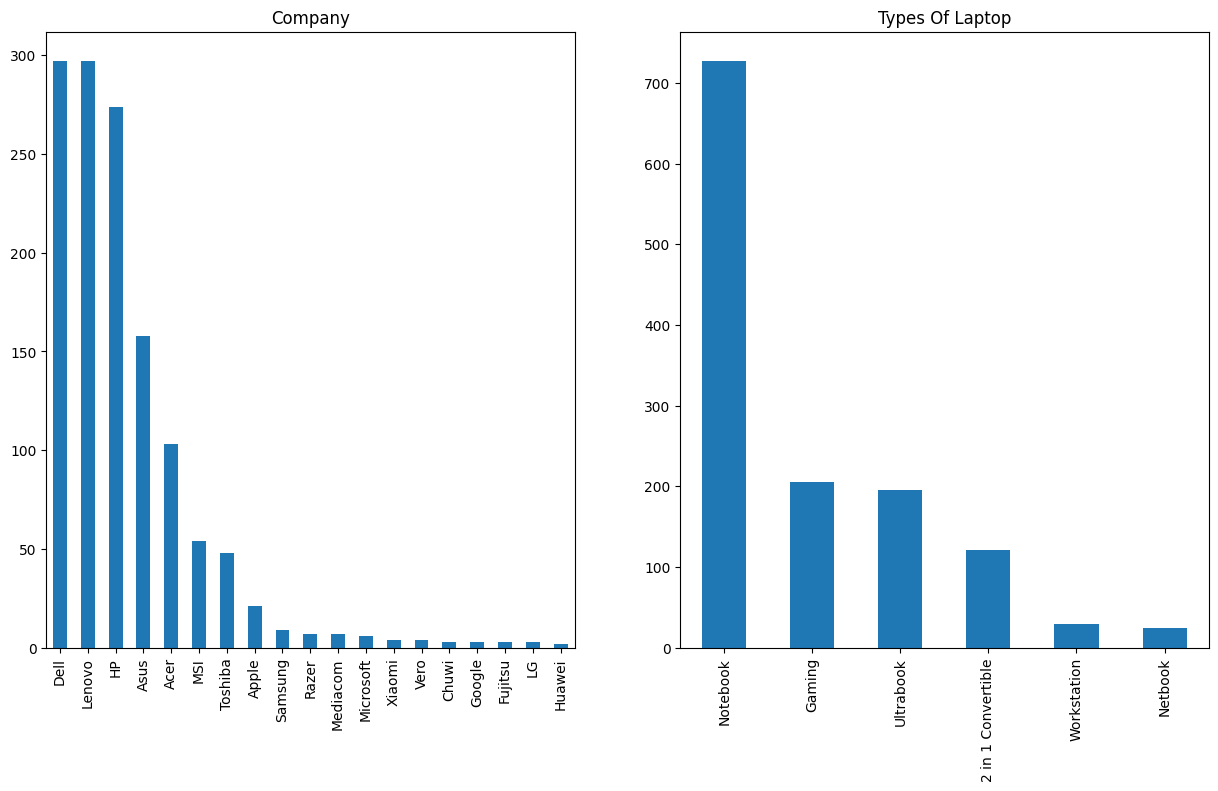

In [5]:
# Number of laptops produced by each company
# Number of types of laptop available
fig, axes = plt.subplots(1, 2, figsize=(15,8), squeeze=False)
laptop['Company'].value_counts().plot(kind='bar', x='Company',ax=axes[0, 0], title='Company')
laptop.TypeName.value_counts().plot(kind='bar', x = 'TypeName', ax = axes[0,1], title = 'Types Of Laptop')

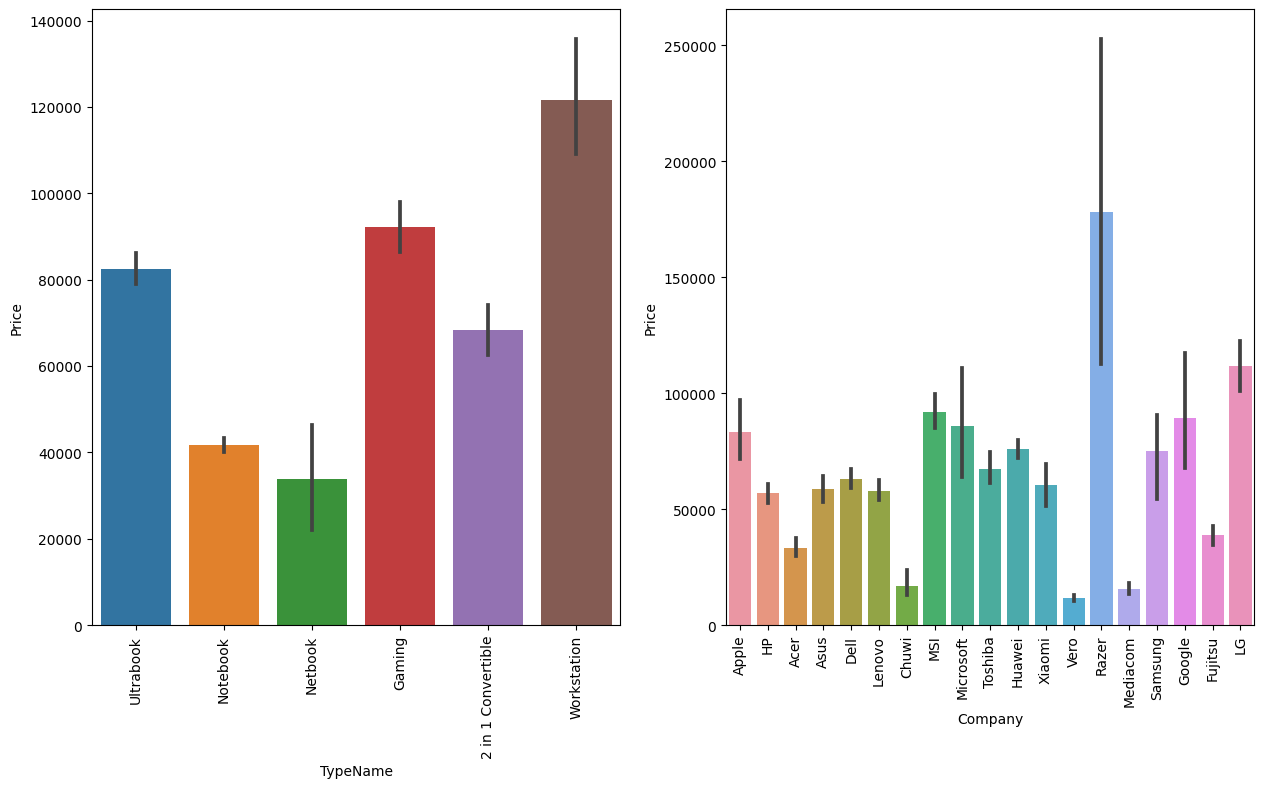

In [6]:
# Company And type of Laptop against Price ---> Barplots
fig, axes = plt.subplots(1, 2, figsize=(15,8), squeeze=False)
sns.barplot(x=laptop['TypeName'], y = laptop['Price'], ax = axes[0,0])
sns.barplot(x=laptop['Company'], y = laptop['Price'], ax = axes[0,1])

axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation='vertical')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation='vertical')
plt.show()

In [7]:
def num_ram_func(laptop_rams):
  rams = list(laptop_rams)
  num_rams = []
  for i in rams:
    num_rams.append(i.split("GB")[0]) # could use this too "num_weights.append(int(i.split("GB")[0]))", then no need for ".astype()"

  return num_rams

def num_weights_func(laptop_weights):
  rams = list(laptop_weights)
  num_weights = []
  for i in rams:
    num_weights.append(i.split("kg")[0]) # could use this too "num_weights.append(float(i.split("kg")[0]))", then no need for ".astype()"

  return num_weights



In [8]:
laptop['Ram'] = num_ram_func(laptop.Ram)
laptop['Ram'] = laptop['Ram'].astype('int32')
laptop['Weight'] = num_weights_func(laptop.Weight)
laptop['Weight'] = laptop['Weight'].astype('float32')

# laptop['Ram'] = laptop['Ram'].str.replace('GB','') ---> easier one line version

Text(0.5, 1.0, 'Ram vs Price')

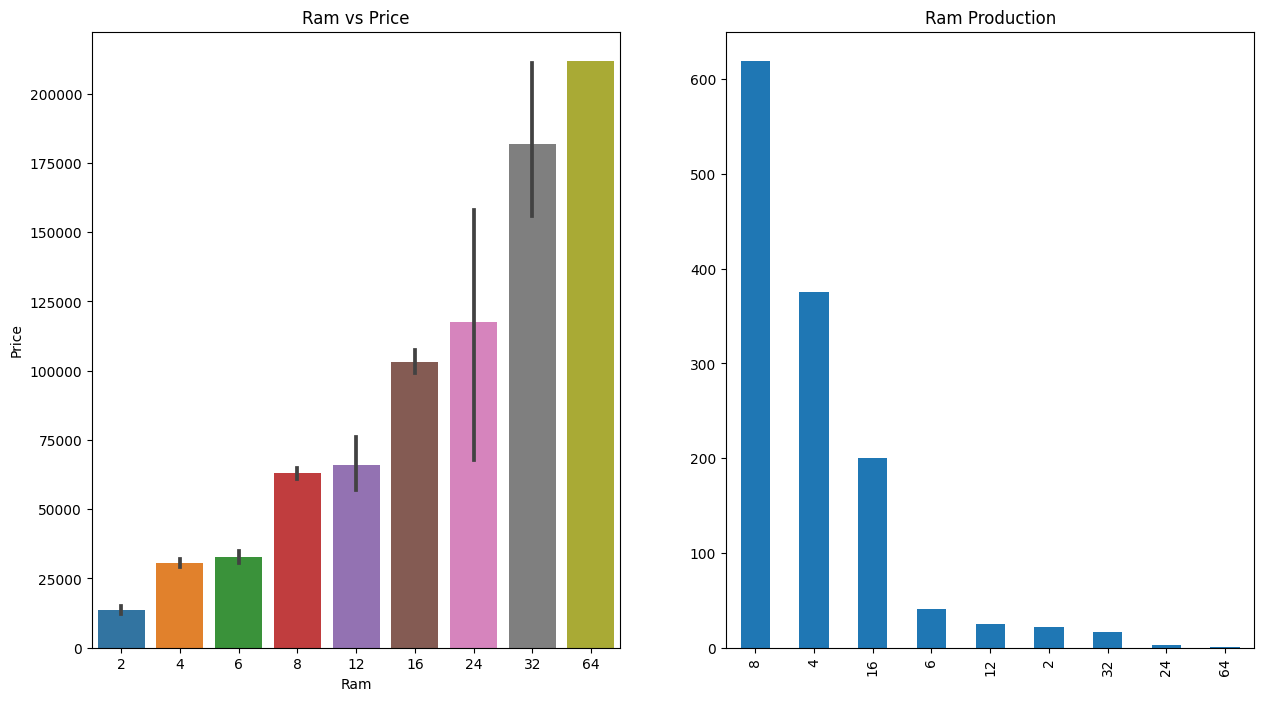

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,8), squeeze=False)
sns.barplot(x=laptop['Ram'], y = laptop['Price'], ax = axes[0,0])
laptop['Ram'].value_counts().plot(kind = 'bar', x = 'Ram', ax = axes[0,1],title = 'Ram Production')

axes[0,0].set_title('Ram vs Price')

In [10]:
laptop.info()
laptop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
unique_rows = laptop.drop_duplicates(subset= ['Memory'])
unique_rows_list =list(unique_rows.Memory)
unique_rows_list

['128GB SSD',
 '128GB Flash Storage',
 '256GB SSD',
 '512GB SSD',
 '500GB HDD',
 '256GB Flash Storage',
 '1TB HDD',
 '32GB Flash Storage',
 '128GB SSD +  1TB HDD',
 '256GB SSD +  256GB SSD',
 '64GB Flash Storage',
 '256GB SSD +  1TB HDD',
 '256GB SSD +  2TB HDD',
 '32GB SSD',
 '2TB HDD',
 '64GB SSD',
 '1.0TB Hybrid',
 '512GB SSD +  1TB HDD',
 '1TB SSD',
 '256GB SSD +  500GB HDD',
 '128GB SSD +  2TB HDD',
 '512GB SSD +  512GB SSD',
 '16GB SSD',
 '16GB Flash Storage',
 '512GB SSD +  256GB SSD',
 '512GB SSD +  2TB HDD',
 '64GB Flash Storage +  1TB HDD',
 '180GB SSD',
 '1TB HDD +  1TB HDD',
 '32GB HDD',
 '1TB SSD +  1TB HDD',
 '512GB Flash Storage',
 '128GB HDD',
 '240GB SSD',
 '8GB SSD',
 '508GB Hybrid',
 '1.0TB HDD',
 '512GB SSD +  1.0TB Hybrid',
 '256GB SSD +  1.0TB Hybrid']

In [12]:
SSD = np.zeros(laptop.shape[0])
HDD = np.zeros(laptop.shape[0])
SSHD = np.zeros(laptop.shape[0])
Flash_Storage = np.zeros(laptop.shape[0])
i = 0
for memory in laptop.Memory:
  memory_split = memory.split()
  if "SSD" in memory_split:
    SSD[i] = 1
  if "HDD" in memory_split:
    HDD[i] = 1
  if "Hybrid" in memory_split:
    SSHD[i] = 1
  if "Flash" in memory_split:
    Flash_Storage[i] = 1
  i += 1
SSD

laptop["SSD"] = SSD
laptop["HDD"] = HDD
laptop["SSHD"] = SSHD
laptop["Flash"] = Flash_Storage

In [13]:
unique_rows = laptop.drop_duplicates(subset= ['Memory'])
unique_rows.head(39)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,SSHD,Flash
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0.0,0.0,0.0,1.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1.0,0.0,0.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1.0,0.0,0.0,0.0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0.0,1.0,0.0,0.0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0.0,0.0,0.0,1.0
18,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,26586.7200,0.0,1.0,0.0,0.0
20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98,10224.4320,0.0,0.0,0.0,1.0
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,1.0,1.0,0.0,0.0
28,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,69157.4400,1.0,0.0,0.0,0.0


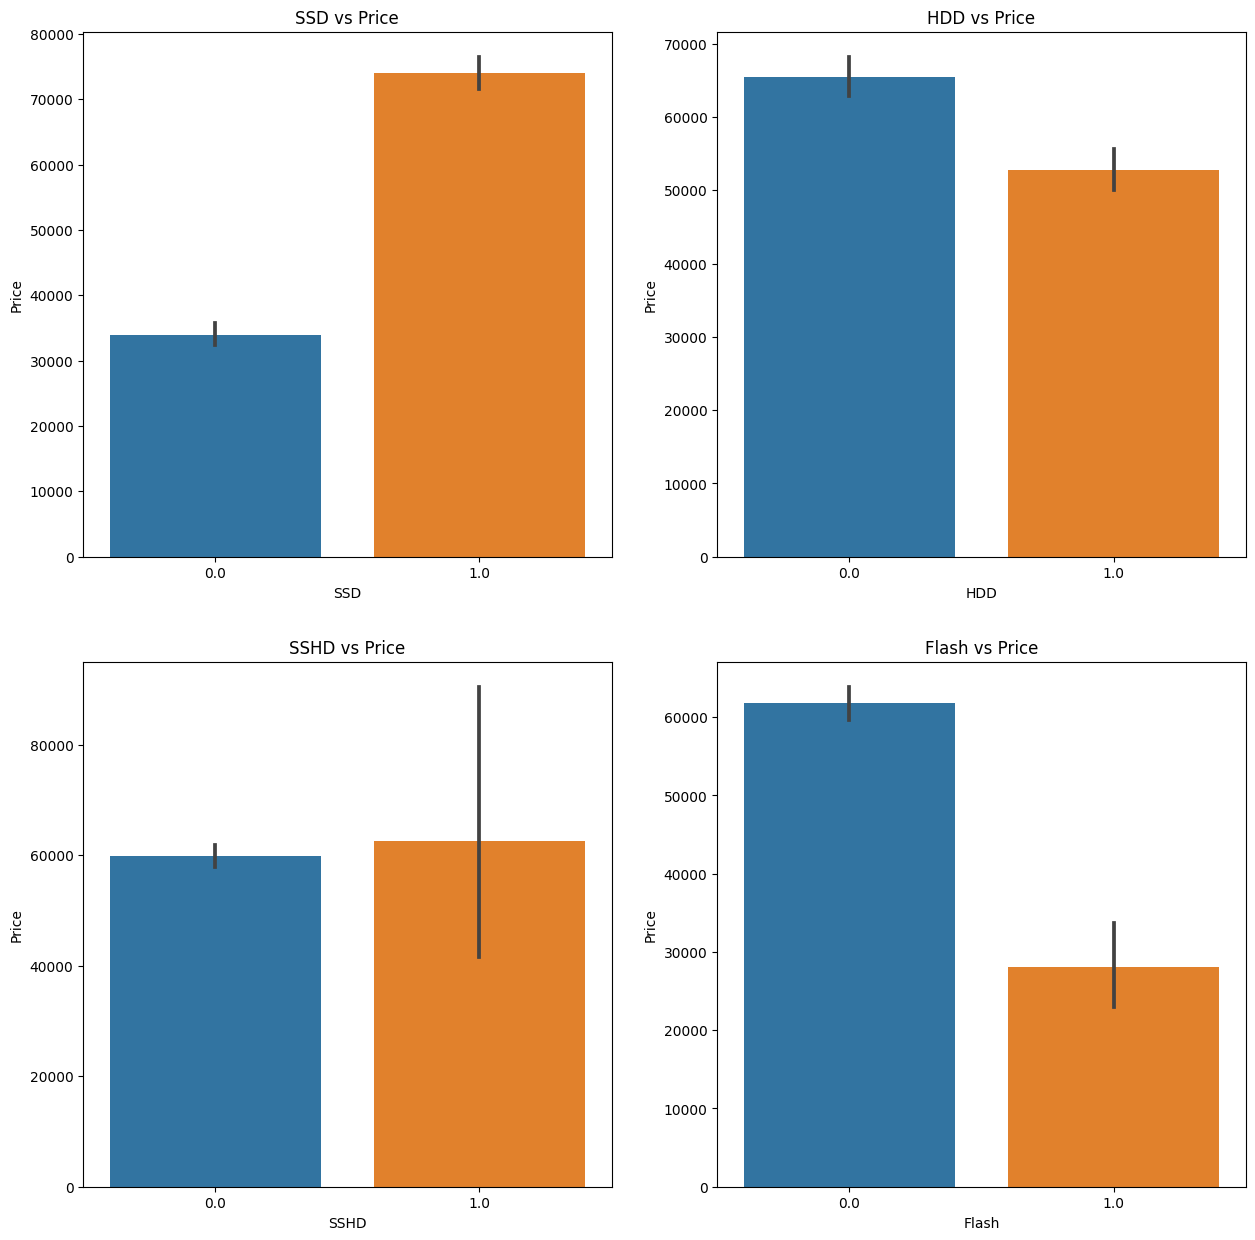

In [14]:
# sns.barplot(x = laptop.SSD, y = laptop.Price)

fig, axes = plt.subplots(2, 2, figsize=(15,15), squeeze=False)
i = 0
list = [["SSD", "HDD"], ["SSHD", "Flash"]]

for i in range(2):
  for j in range(2):
    sns.barplot(x=laptop[list[i][j]], y = laptop['Price'], ax = axes[i,j])
    axes[i,j].set_title(list[i][j]+" vs Price")
plt.show()

In [15]:
laptop['Memory'] = laptop.Memory.str.replace('GB', '')
laptop['Memory'] = laptop.Memory.str.replace('TB', '000')
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop.tail(10)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,SSHD,Flash
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0.0,1.0,0.0,0.0
1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1000 Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0.0,0.0,1.0,0.0
1295,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1000 HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0.0,1.0,0.0,0.0
1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.17,11135.5200,0.0,0.0,0.0,1.0
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0.0,1.0,0.0,0.0
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1.0,0.0,0.0,0.0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1.0,0.0,0.0,0.0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0.0,0.0,0.0,1.0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0.0,1.0,0.0,0.0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0.0,1.0,0.0,0.0


In [16]:
new = laptop["Memory"].str.split("+",n =1, expand = True)
new[1].fillna("0", inplace = True)
# for i in new[1]:
#   if i != '0':
#     print(i)



In [17]:
laptop['before+SSD'] = new[0].apply(lambda x: 1 if "SSD" in x else 0)
laptop['After+SSD'] = new[1].apply(lambda x: 1 if "SSD" in x else 0)

laptop['before+HDD'] = new[0].apply(lambda x: 1 if "HDD" in x else 0)
laptop['After+HDD'] = new[1].apply(lambda x: 1 if "HDD" in x else 0)

laptop['before+SSHD'] = new[0].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop['After+SSHD'] = new[1].apply(lambda x: 1 if "Hybrid" in x else 0)

laptop['before+Flash'] = new[0].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptop['After+Flash'] = new[1].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [18]:
unique_rows = laptop.drop_duplicates(subset= ['Memory'])
unique_rows.head(39)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,SSHD,Flash,before+SSD,After+SSD,before+HDD,After+HDD,before+SSHD,After+SSHD,before+Flash,After+Flash
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0.0,0.0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0.0,1.0,0,0,0,0,0,0,1,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0.0,0.0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0.0,0.0,1,0,0,0,0,0,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.10,...,0.0,0.0,0,0,1,0,0,0,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,...,0.0,1.0,0,0,0,0,0,0,1,0
18,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,...,0.0,0.0,0,0,1,0,0,0,0,0
20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,0.98,...,0.0,1.0,0,0,0,0,0,0,1,0
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,...,0.0,0.0,1,0,0,1,0,0,0,0
28,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8,256 SSD + 256 SSD,Intel UHD Graphics 620,Windows 10,1.88,...,0.0,0.0,1,1,0,0,0,0,0,0


In [19]:
new[0] = new[0].str.replace(r'\D', '').astype(int)
new[1] = new[1].str.replace(r'\D', '').astype(int)

<ipython-input-19-4ec40c8dab35>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new[0] = new[0].str.replace(r'\D', '').astype(int)
<ipython-input-19-4ec40c8dab35>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new[1] = new[1].str.replace(r'\D', '').astype(int)


In [20]:
laptop["HDD"]=(new[0]*laptop["before+HDD"]+new[1]*laptop["After+HDD"])
laptop["SSD"]=(new[0]*laptop["before+SSD"]+new[1]*laptop["After+SSD"])
laptop["Hybrid"]=(new[0]*laptop["before+SSHD"]+new[1]*laptop["After+SSHD"])
laptop["Flash_Storage"]=(new[0]*laptop["before+Flash"]+new[1]*laptop["After+Flash"])

In [21]:
laptop = laptop.drop(["before+HDD","After+HDD","before+SSD","After+SSD","before+SSHD","After+SSHD","before+Flash","After+Flash", "SSHD", "Flash"], axis =1 )

In [22]:
unique_rows = laptop.drop_duplicates(subset= ['Memory'])
unique_rows.head(39)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,500,0,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,0,0,256
18,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,26586.7200,0,1000,0,0
20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2,32 Flash Storage,Intel HD Graphics 400,Windows 10,0.98,10224.4320,0,0,0,32
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,128,1000,0,0
28,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8,256 SSD + 256 SSD,Intel UHD Graphics 620,Windows 10,1.88,69157.4400,512,0,0,0


In [23]:
laptop = laptop.drop(["Memory"], axis = 1)

In [24]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Hybrid,Flash_Storage
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.49,51148.80,256,0,0,0
868,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.56,48058.56,256,0,0,0
257,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,2.90,56423.52,0,1000,0,0
1052,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.7GHz,8,Intel HD Graphics 620,Windows 10,2.30,58288.32,256,0,0,0
1226,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.29,78694.56,256,0,0,0


In [25]:
laptop['IPS'] = laptop['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)

In [26]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Hybrid,Flash_Storage,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,0,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,0,0,0,1


Text(0.5, 1.0, 'IPS vs Price')

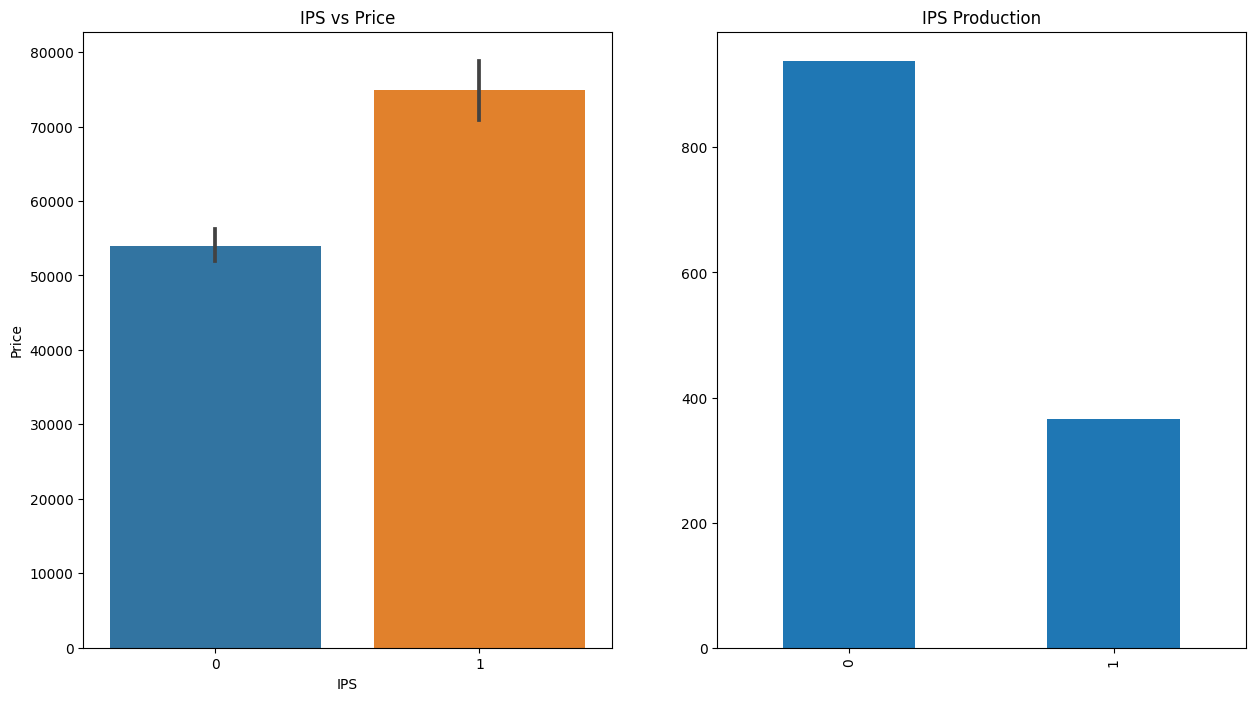

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,8), squeeze=False)
sns.barplot(x=laptop['IPS'], y = laptop['Price'], ax = axes[0,0])
laptop['IPS'].value_counts().plot(kind = 'bar', x = 'IPS', ax = axes[0,1],title = 'IPS Production')

axes[0,0].set_title('IPS vs Price')

In [28]:
laptop["Cpu_Name"] = laptop["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [29]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD,Hybrid,Flash_Storage,IPS,Cpu_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,0,0,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,128,0,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,0,0,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,0,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,0,0,0,1,Intel Core i5


In [30]:
laptop["Cpu_Name"].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

[Text(0, 0, 'Intel Core i5'),
 Text(1, 0, 'Intel Core i7'),
 Text(2, 0, 'AMD A9-Series 9420'),
 Text(3, 0, 'Intel Core i3'),
 Text(4, 0, 'Intel Core M'),
 Text(5, 0, 'Intel Atom x5-Z8350'),
 Text(6, 0, 'AMD E-Series E2-9000e'),
 Text(7, 0, 'Intel Atom x5-Z8300'),
 Text(8, 0, 'AMD E-Series E2-6110'),
 Text(9, 0, 'AMD A6-Series 9220'),
 Text(10, 0, 'Intel Celeron Dual'),
 Text(11, 0, 'AMD Ryzen 1700'),
 Text(12, 0, 'Intel Pentium Quad'),
 Text(13, 0, 'Intel Atom x5-Z8550'),
 Text(14, 0, 'AMD FX 9830P'),
 Text(15, 0, 'AMD E-Series 6110'),
 Text(16, 0, 'Intel Xeon E3-1505M'),
 Text(17, 0, 'AMD E-Series 9000e'),
 Text(18, 0, 'AMD A10-Series A10-9620P'),
 Text(19, 0, 'AMD A6-Series A6-9220'),
 Text(20, 0, 'AMD A10-Series 9600P'),
 Text(21, 0, 'AMD A8-Series 7410'),
 Text(22, 0, 'AMD A12-Series 9720P'),
 Text(23, 0, 'Intel Celeron Quad'),
 Text(24, 0, 'AMD Ryzen 1600'),
 Text(25, 0, 'AMD A10-Series 9620P'),
 Text(26, 0, 'AMD E-Series 7110'),
 Text(27, 0, 'AMD A9-Series A9-9420'),
 Text(28, 0,

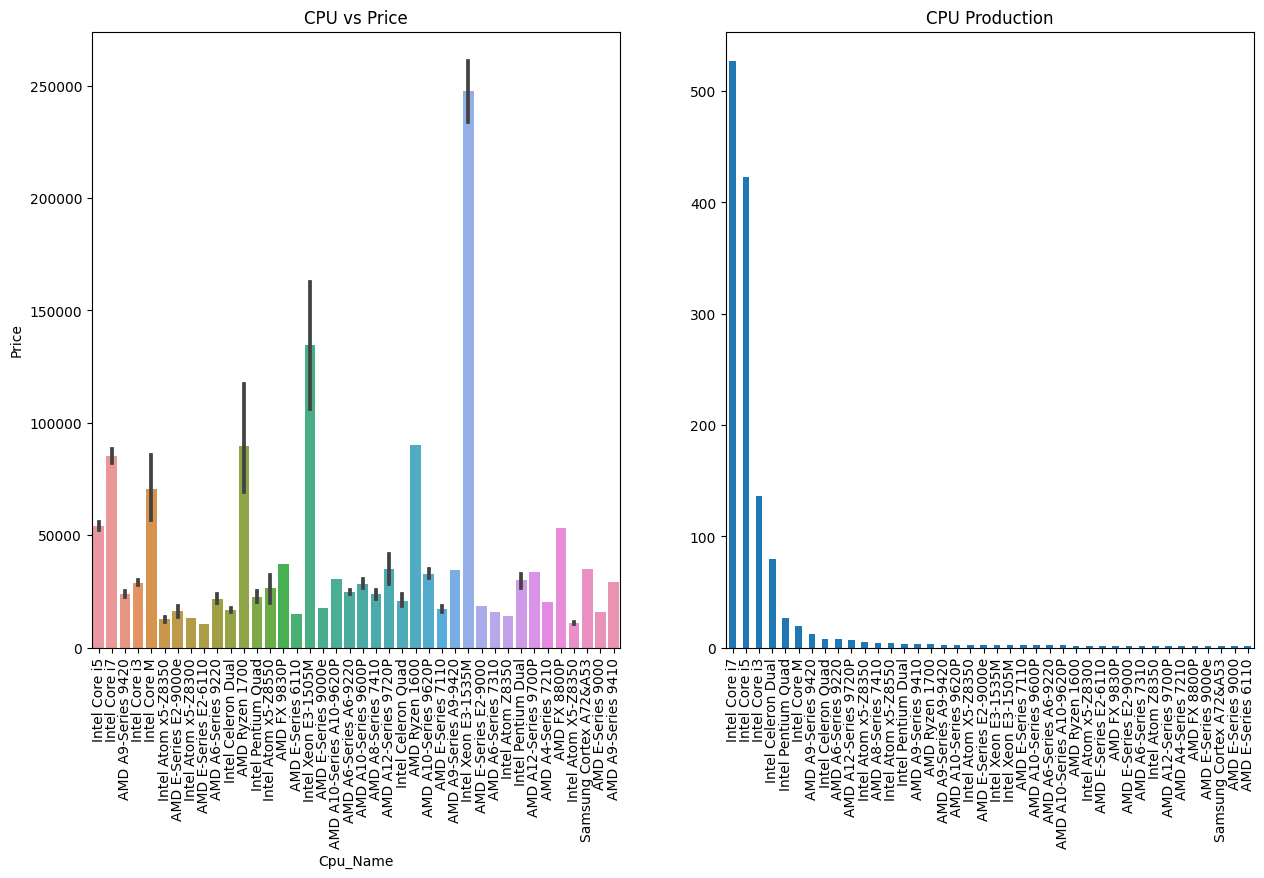

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,8), squeeze=False)
sns.barplot(x=laptop['Cpu_Name'], y = laptop['Price'], ax = axes[0,0])
laptop['Cpu_Name'].value_counts().plot(kind = 'bar', x = 'Cpu_Name', ax = axes[0,1],title = 'CPU Production')

axes[0,0].set_title('CPU vs Price')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation='vertical')

In [32]:
laptop['Gpu_Brand'] = laptop["Gpu"].apply(lambda x: "".join(x.split()[0]))
laptop['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [33]:
# #Searching for a specific row with specific value
# search_value = 'Intel UHD Graphics 620'
# result = laptop[laptop['Gpu'] == search_value]
# result.head()

# # Searching for a substring in a DataFrame column
# substring = 'AMD'
# result = laptop[laptop['Gpu'].str.contains(substring, case=False)]
# result.head()

# # To see the whole list as result.head() only gives 5 rows
# print(result.to_string())

# # for printing all the unique rows in a specific column
# gpu_list = laptop['Gpu'].unique()
# print(gpu_list)

In [34]:
laptop = laptop[laptop['Gpu_Brand'] != 'ARM']
laptop['Gpu_Brand'].value_counts()


Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

[Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')]

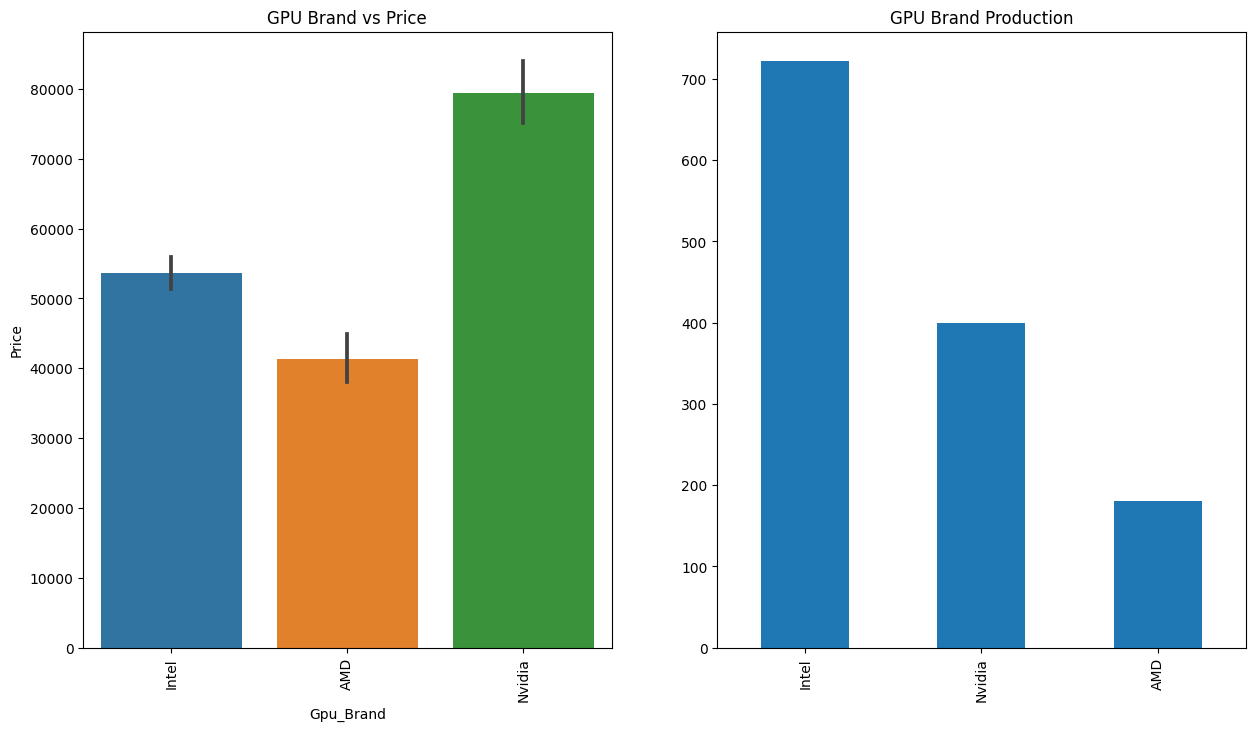

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15,8), squeeze=False)
sns.barplot(x=laptop['Gpu_Brand'], y = laptop['Price'], ax = axes[0,0])
laptop['Gpu_Brand'].value_counts().plot(kind = 'bar', x = 'Gpu_Brand', ax = axes[0,1],title = 'GPU Brand Production')

axes[0,0].set_title('GPU Brand vs Price')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation='vertical')

In [36]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [37]:
one_hot = pd.get_dummies(laptop['OpSys'], prefix='OpSys')

# Concatenate the one-hot encoded columns with the original DataFrame
laptop_encoded = pd.concat([laptop['Price'], one_hot], axis=1)

# Calculate the correlation between the one-hot encoded columns and the 'Price' column
correlation = laptop_encoded.corr()['Price']

# print(correlation)
sorted_corr = correlation.sort_values(ascending=False)
print(sorted_corr)

Price                 1.000000
OpSys_Windows 7       0.152312
OpSys_Windows 10      0.136213
OpSys_macOS           0.089893
OpSys_Windows 10 S    0.018275
OpSys_Mac OS X        0.015619
OpSys_Android        -0.038727
OpSys_Chrome OS      -0.117342
OpSys_Linux          -0.162204
OpSys_No OS          -0.177246
Name: Price, dtype: float64


In [38]:
def op_sys(text):
  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
    return 'Windows'
  elif text == 'Mac OS X' or text == 'macOS':
    return 'Mac'
  else:
    return 'Other/Linux/No OS'

In [39]:
laptop['OS'] = laptop['OpSys'].apply(op_sys)

In [40]:
one_hot = pd.get_dummies(laptop['OS'], prefix='OS')

# Concatenate the one-hot encoded columns with the original DataFrame
laptop_encoded = pd.concat([laptop['Price'], one_hot], axis=1)

# Calculate the correlation between the one-hot encoded columns and the 'Price' column
correlation = laptop_encoded.corr()['Price']

sorted_corr = correlation.sort_values(ascending=False)
print(sorted_corr)

Price                   1.000000
OS_Windows              0.236918
OS_Mac                  0.080636
OS_Other/Linux/No OS   -0.281318
Name: Price, dtype: float64


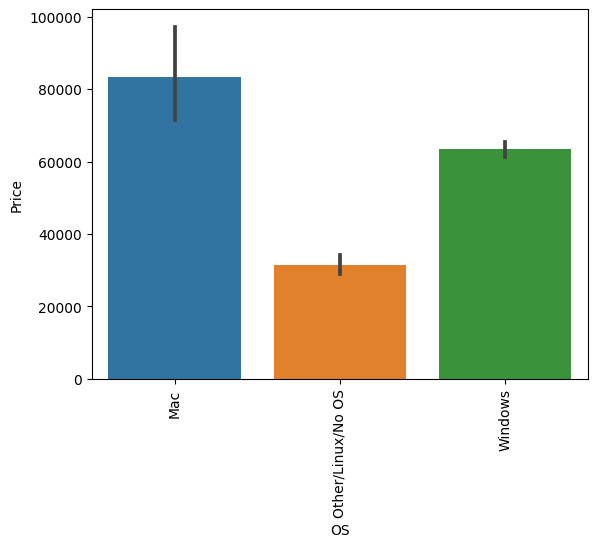

In [41]:
sns.barplot(x=laptop['OS'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
laptop = laptop.drop(['Cpu', 'Gpu', 'OpSys'], axis = 1)
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Weight,Price,SSD,HDD,Hybrid,Flash_Storage,IPS,Cpu_Name,Gpu_Brand,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,71378.6832,128,0,0,0,1,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,1.34,47895.5232,0,0,0,128,0,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,8,1.86,30636.0000,256,0,0,0,0,Intel Core i5,Intel,Other/Linux/No OS
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,1.83,135195.3360,512,0,0,0,1,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,96095.8080,256,0,0,0,1,Intel Core i5,Intel,Mac


In [43]:
laptop['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [44]:
new = laptop["ScreenResolution"].str.split("x", n = 1, expand = True)
new[0] = new[0].str.replace(r'\D', '')

<ipython-input-44-0427d5d9ffa9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new[0] = new[0].str.replace(r'\D', '')


In [45]:
new = new.astype(int)

In [46]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1302 non-null   int64
 1   1       1302 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


In [47]:
laptop['PPI'] = ((new[0]**2 + new[1]**2)**0.5)/laptop['Inches']

In [48]:
laptop = laptop.drop(['Inches', 'ScreenResolution'], axis = 1)
laptop.head()

,Company,TypeName,Ram,Weight,Price,SSD,HDD,Hybrid,Flash_Storage,IPS,Cpu_Name,Gpu_Brand,OS,PPI
0,Apple,Ultrabook,8,1.37,71378.6832,128,0,0,0,1,Intel Core i5,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,0,128,0,Intel Core i5,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,30636.0000,256,0,0,0,0,Intel Core i5,Intel,Other/Linux/No OS,141.211998
3,Apple,Ultrabook,16,1.83,135195.3360,512,0,0,0,1,Intel Core i7,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,96095.8080,256,0,0,0,1,Intel Core i5,Intel,Mac,226.983005


In [49]:
correlation = laptop.corr()['Price']
sorted_corr = correlation.sort_values(ascending=False)
print(sorted_corr)

Price            1.000000
Ram              0.742905
SSD              0.670660
PPI              0.351919
IPS              0.253320
Weight           0.209867
Hybrid           0.007942
Flash_Storage   -0.040067
HDD             -0.096891
Name: Price, dtype: float64


<ipython-input-49-83bf8a1d15e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = laptop.corr()['Price']


In [50]:
laptop = laptop.drop(['Hybrid'], axis = 1)
laptop.head()

,Company,TypeName,Ram,Weight,Price,SSD,HDD,Flash_Storage,IPS,Cpu_Name,Gpu_Brand,OS,PPI
0,Apple,Ultrabook,8,1.37,71378.6832,128,0,0,1,Intel Core i5,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,128,0,Intel Core i5,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,30636.0000,256,0,0,0,Intel Core i5,Intel,Other/Linux/No OS,141.211998
3,Apple,Ultrabook,16,1.83,135195.3360,512,0,0,1,Intel Core i7,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,96095.8080,256,0,0,1,Intel Core i5,Intel,Mac,226.983005


<Axes: xlabel='PPI', ylabel='Price'>

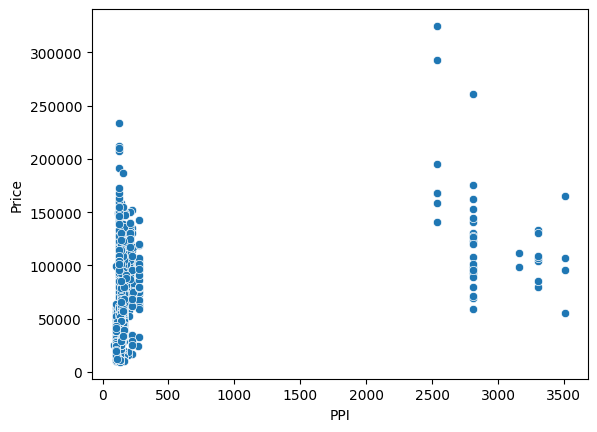

In [51]:
sns.scatterplot(x=laptop['PPI'],y=laptop['Price'])

<ipython-input-52-e0c69846e014>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price']))


<Axes: xlabel='Price', ylabel='Density'>

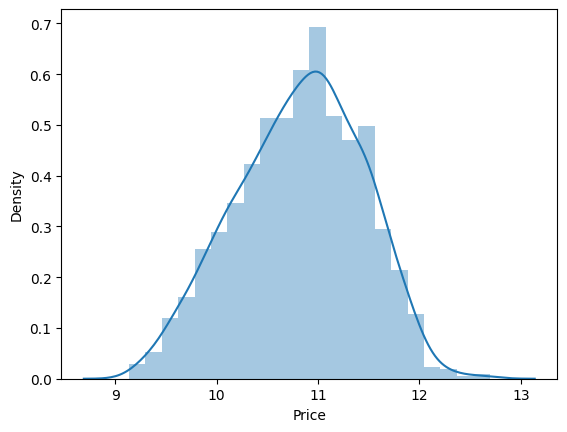

In [52]:
sns.distplot(np.log(laptop['Price']))

In [53]:
X = laptop.drop(columns=['Price'])
y = np.log(laptop['Price'])

In [54]:
X

,Company,TypeName,Ram,Weight,SSD,HDD,Flash_Storage,IPS,Cpu_Name,Gpu_Brand,OS,PPI
0,Apple,Ultrabook,8,1.37,128,0,0,1,Intel Core i5,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,0,0,128,0,Intel Core i5,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,256,0,0,0,Intel Core i5,Intel,Other/Linux/No OS,141.211998
3,Apple,Ultrabook,16,1.83,512,0,0,1,Intel Core i7,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,256,0,0,1,Intel Core i5,Intel,Mac,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,128,0,0,1,Intel Core i7,Intel,Windows,157.350512
1299,Lenovo,2 in 1 Convertible,16,1.30,512,0,0,1,Intel Core i7,Intel,Windows,276.053530
1300,Lenovo,Notebook,2,1.50,0,0,64,0,Intel Celeron Dual,Intel,Windows,111.935204
1301,HP,Notebook,6,2.19,0,1000,0,0,Intel Core i7,AMD,Windows,100.454670


In [55]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [58]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [59]:
X_train

,Company,TypeName,Ram,Weight,SSD,HDD,Flash_Storage,IPS,Cpu_Name,Gpu_Brand,OS,PPI
1259,MSI,Gaming,8,2.40,128,1000,0,0,Intel Core i7,Nvidia,Windows,141.211998
1007,HP,Ultrabook,8,1.43,256,0,0,0,Intel Core i7,Intel,Windows,157.350512
1147,Dell,Notebook,8,2.18,256,0,0,0,Intel Core i7,Nvidia,Windows,141.211998
478,Dell,Notebook,8,2.20,0,1000,0,0,Intel Core i5,AMD,Windows,141.211998
494,Asus,Gaming,24,4.33,256,1000,0,1,Intel Core i7,Nvidia,Windows,127.335675
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Lenovo,Notebook,8,1.87,256,0,0,1,Intel Core i5,Nvidia,Windows,157.350512
905,LG,Ultrabook,16,1.08,512,0,0,1,Intel Core i7,Intel,Windows,141.211998
1096,Dell,Notebook,8,2.36,0,1000,0,0,Intel Core i5,AMD,Windows,141.211998
235,Dell,Notebook,16,2.36,256,0,0,0,Intel Core i7,AMD,Other/Linux/No OS,141.211998


In [60]:
# colmn_trans = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,9,10])
# ],remainder='passthrough')

# model = LinearRegression()

# pipe = Pipeline([
#     ('transfor',colmn_trans),
#     ('model',model)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

In [61]:
X_test['Cpu_Name'].value_counts()

Intel Core i7            115
Intel Core i5             82
Intel Core i3             23
Intel Celeron Dual        12
Intel Pentium Quad         7
Intel Core M               5
AMD A12-Series 9720P       4
Intel Atom x5-Z8550        1
AMD A6-Series A6-9220      1
AMD A8-Series 7410         1
AMD Ryzen 1700             1
AMD FX 9830P               1
AMD E-Series 7110          1
AMD A9-Series 9420         1
AMD A10-Series 9600P       1
AMD E-Series E2-9000e      1
Intel Xeon E3-1505M        1
AMD A9-Series A9-9420      1
AMD E-Series E2-9000       1
AMD E-Series 9000e         1
Name: Cpu_Name, dtype: int64

In [62]:
X_train['Cpu_Name'].value_counts()

Intel Core i7               412
Intel Core i5               341
Intel Core i3               113
Intel Celeron Dual           68
Intel Pentium Quad           20
Intel Core M                 14
AMD A9-Series 9420           11
AMD A6-Series 9220            8
Intel Celeron Quad            8
Intel Atom x5-Z8350           5
AMD A9-Series 9410            3
AMD A12-Series 9720P          3
Intel Pentium Dual            3
AMD A8-Series 7410            3
Intel Atom x5-Z8550           3
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A10-Series A10-9620P      2
AMD Ryzen 1700                2
AMD A12-Series 9700P          1
AMD E-Series 7110             1
AMD E-Series 9000             1
AMD A9-Series A9-9420         1
AMD A6-Series 7310            1
Intel Atom Z8350              1
AMD A10-Series 9600P          1
AMD FX 8800P                  1
Intel Atom x5-Z8300           1
AMD E-Series E2-9000e         1
Intel Xeon E3-1505M           1
AMD E-Se

In [63]:
#Searching for a specific row with specific value
search_value = 'AMD E-Series E2-9000'
result = X_train[X_train['Cpu_Name'] == search_value]
result.head()

,Company,TypeName,Ram,Weight,SSD,HDD,Flash_Storage,IPS,Cpu_Name,Gpu_Brand,OS,PPI


In [64]:
def cpu_brand(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
      return text
  else:
      if text.split()[0] == 'Intel':
          return 'Other Intel Processor'
      else:
          return 'AMD Processor'

In [65]:
laptop['Cpu_Brand'] = laptop['Cpu_Name'].apply(cpu_brand)

In [66]:
laptop = laptop.drop(['Cpu_Name'], axis = 1)
laptop.head()

,Company,TypeName,Ram,Weight,Price,SSD,HDD,Flash_Storage,IPS,Gpu_Brand,OS,PPI,Cpu_Brand
0,Apple,Ultrabook,8,1.37,71378.6832,128,0,0,1,Intel,Mac,226.983005,Intel Core i5
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,128,0,Intel,Mac,127.677940,Intel Core i5
2,HP,Notebook,8,1.86,30636.0000,256,0,0,0,Intel,Other/Linux/No OS,141.211998,Intel Core i5
3,Apple,Ultrabook,16,1.83,135195.3360,512,0,0,1,AMD,Mac,220.534624,Intel Core i7
4,Apple,Ultrabook,8,1.37,96095.8080,256,0,0,1,Intel,Mac,226.983005,Intel Core i5


<ipython-input-67-3a1c4dcdec9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(laptop.corr())


<Axes: >

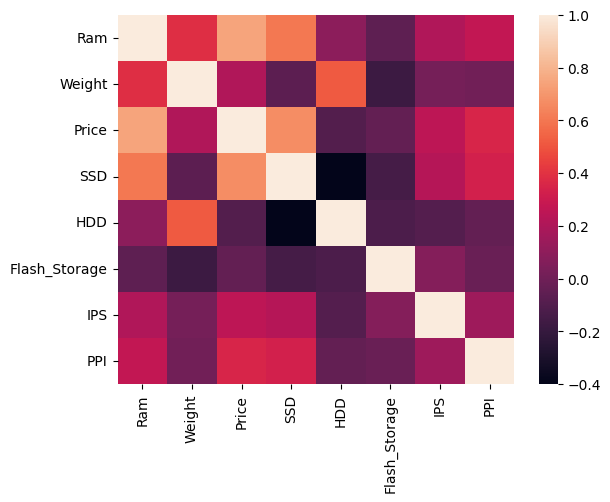

In [67]:
sns.heatmap(laptop.corr())

In [68]:
X = laptop.drop(columns=['Price'])
y = np.log(laptop['Price'])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train

,Company,TypeName,Ram,Weight,SSD,HDD,Flash_Storage,IPS,Gpu_Brand,OS,PPI,Cpu_Brand
1259,MSI,Gaming,8,2.40,128,1000,0,0,Nvidia,Windows,141.211998,Intel Core i7
1007,HP,Ultrabook,8,1.43,256,0,0,0,Intel,Windows,157.350512,Intel Core i7
1147,Dell,Notebook,8,2.18,256,0,0,0,Nvidia,Windows,141.211998,Intel Core i7
478,Dell,Notebook,8,2.20,0,1000,0,0,AMD,Windows,141.211998,Intel Core i5
494,Asus,Gaming,24,4.33,256,1000,0,1,Nvidia,Windows,127.335675,Intel Core i7
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Lenovo,Notebook,8,1.87,256,0,0,1,Nvidia,Windows,157.350512,Intel Core i5
905,LG,Ultrabook,16,1.08,512,0,0,1,Intel,Windows,141.211998,Intel Core i7
1096,Dell,Notebook,8,2.36,0,1000,0,0,AMD,Windows,141.211998,Intel Core i5
235,Dell,Notebook,16,2.36,256,0,0,0,AMD,Other/Linux/No OS,141.211998,Intel Core i7


In [70]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = LinearRegression()

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7793171473986951
MAE 0.21720092306122574


In [71]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = Ridge(alpha=10)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7738050087503148
MAE 0.21790911930572338


In [72]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = Lasso(alpha=0.001)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7765907470381889
MAE 0.21747459742006223


In [73]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7427012886275709
MAE 0.22386978151467335


In [74]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8429972511639836
MAE 0.18399845272664328


In [75]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7971817089414696
MAE 0.19628164389951297


In [76]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                              )

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8730552255251591
MAE 0.16683830779332937


In [77]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7831365264083472
MAE 0.22774812686012919


In [78]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8804227652244396
MAE 0.15723441771163107


In [79]:
colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

model = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8807046409146797
MAE 0.15513611115316409


In [80]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

colmn_trans = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,8,9,11])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

model = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('transfor',colmn_trans),
    ('model',model)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8645373301974919
MAE 0.17517055251815108
